# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import importlib


from BitcoinModeler import *


# Bitcoin Price Prediction

This notebook trains simple linear models for BTC price horizons **H1** and **H7**, evaluates them on **Train/Validation/Test**, plots performance


## üß± Data & Splits

We load preprocessed CSVs for both horizons:

- **Train**: used to fit model parameters  
- **Validation (val)**: used to choose models/hyperparameters (no peeking at Test)  
- **Test**: used once at the end for an unbiased performance estimate




In [2]:
# Load h1 data
h1_train = pd.read_csv('../data/processed/h1_vif_train.csv')
h1_val = pd.read_csv('../data/processed/h1_vif_val.csv')
h1_test = pd.read_csv('../data/processed/h1_vif_test.csv')

# Load h7 data
h7_train = pd.read_csv('../data/processed/h7_vif_train.csv')
h7_val = pd.read_csv('../data/processed/h7_vif_val.csv')
h7_test = pd.read_csv('../data/processed/h7_vif_test.csv')

print(f"H1 - Train: {h1_train.shape}, Val: {h1_val.shape}, Test: {h1_test.shape}")
print(f"H7 - Train: {h7_train.shape}, Val: {h7_val.shape}, Test: {h7_test.shape}")

H1 - Train: (1877, 64), Val: (402, 64), Test: (403, 64)
H7 - Train: (1873, 64), Val: (401, 64), Test: (402, 64)


In [3]:
bundle_h1=DataManager.prepare(h1_train, h1_val, h1_test, "y_btc_close_t+1","H1")
bundle_h7=DataManager.prepare(h7_train, h7_val, h7_test, "y_btc_close_t+7","H7")

> Note: Features are **already z-score normalized using train-only stats** in `split.py` to avoid leakage.

In [4]:
# optional if you want to compare scaled vs unscaled 
#scaler_h1_cls = ScalerManager()
#bundle_h1_scaled = scaler_h1_cls.scale_bundle(bundle_h1)

#scaler_h7_cls = ScalerManager()
#bundle_h7_scaled = scaler_h7_cls.scale_bundle(bundle_h7)
#print("Class-based DataBundle objects created (both raw and scaled variants).")


## üöÄ Model Runs

We fit all three models on **H1 (1-day)** and **H7 (7-day)** horizons, then print per-split metrics.


In [5]:
# === Run experiments
runner_h1 = ExperimentRunner(bundle_h1, scaled=True)
df_h1 = runner_h1.run()

runner_h7 = ExperimentRunner(bundle_h7, scaled=True)
df_h7 = runner_h7.run()

#runner_h1s = ExperimentRunner(bundle_h1_scaled, scaled=True)
#df_h1s = runner_h1s.run()

#runner_h7s = ExperimentRunner(bundle_h7_scaled, scaled=True)
#df_h7s = runner_h7s.run()



/Users/myint1/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+05, tolerance: 9.971e+03
  model = cd_fast.enet_coordinate_descent(
/Users/myint1/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.983e+05, tolerance: 9.959e+03
  model = cd_fast.enet_coordinate_descent(


## üìä Results Table (All Models √ó Splits)


In [6]:

# Merge all for a single summary table 
results_df_classes = pd.concat([df_h1, df_h7], ignore_index=True)
print("\n‚Äî‚Äî‚Äî CLASS-BASED RESULTS SUMMARY ‚Äî‚Äî‚Äî")
print(results_df_classes.to_string(index=False, float_format="%.6f"))


‚Äî‚Äî‚Äî CLASS-BASED RESULTS SUMMARY ‚Äî‚Äî‚Äî
Horizon Scaled?  Model    Dataset            MSE        RMSE        MAE       R2
     H1     Yes Linear Validation     386.460641   19.658602  12.094807 0.983038
     H1     Yes Linear       Test  235784.524346  485.576487 245.162722 0.988930
     H1     Yes  Ridge Validation    3363.108609   57.992315  46.176064 0.852393
     H1     Yes  Ridge       Test 1078144.373322 1038.337312 637.877213 0.949382
     H1     Yes  Lasso Validation    2558.828585   50.584865  39.968072 0.887693
     H1     Yes  Lasso       Test  866725.387095  930.980874 560.716757 0.959308
     H7     Yes Linear Validation    3065.284967   55.365016  35.400979 0.865957
     H7     Yes Linear       Test 2184313.997933 1477.942488 799.256720 0.897488
     H7     Yes  Ridge Validation    5097.243246   71.394981  47.985527 0.777101
     H7     Yes  Ridge       Test 3015904.506338 1736.635974 903.458519 0.858461
     H7     Yes  Lasso Validation    4513.056869   67.179289

In [7]:


# Feature importance for Lasso models

lasso_h1 = [m for m in runner_h1.models if m.name == "Lasso"][0]
lasso_h7 = [m for m in runner_h7.models if m.name == "Lasso"][0]
H1ModelWrap=ModelWrapper("H1",lasso_h1.model)
H7ModelWrap=ModelWrapper("H7",lasso_h7.model)



## üìà Lasso Performance ‚Äî Validation vs Test

The chart below compares **Nonzero** vs **Zero**  for each horizon (H1, H7).  



Feature Importance Analysis


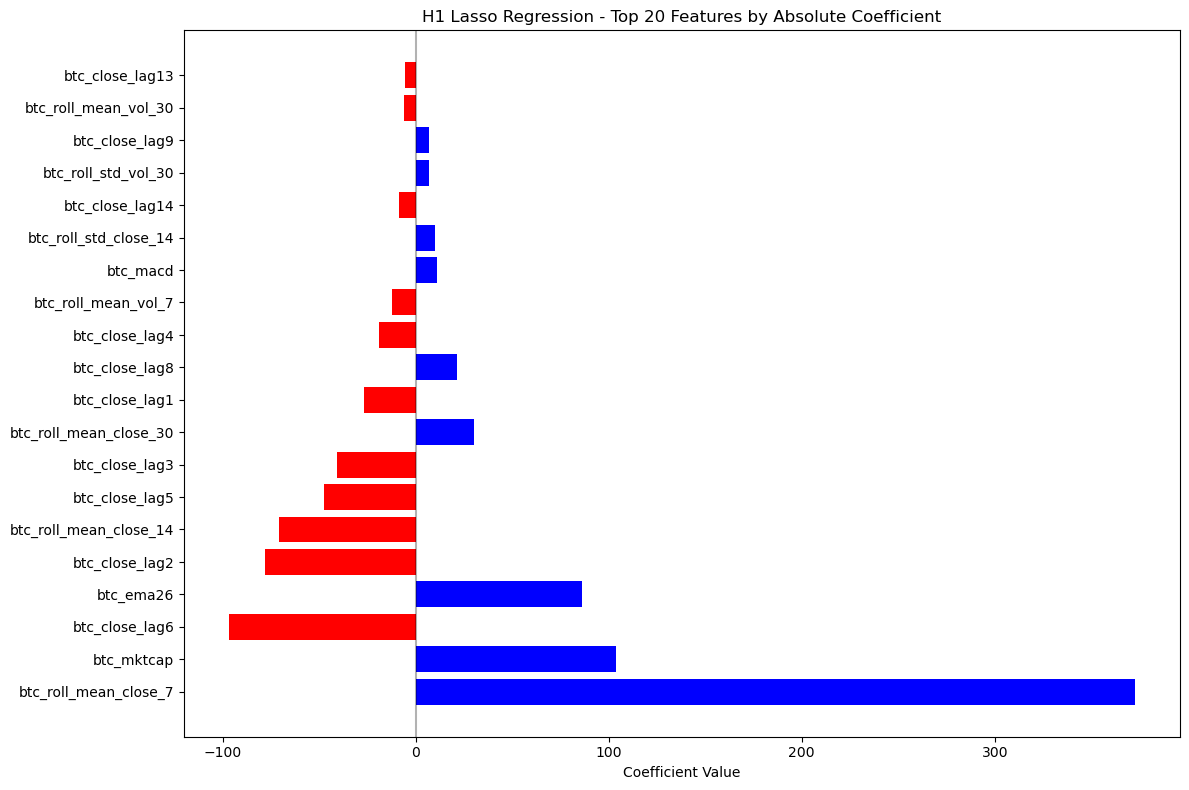

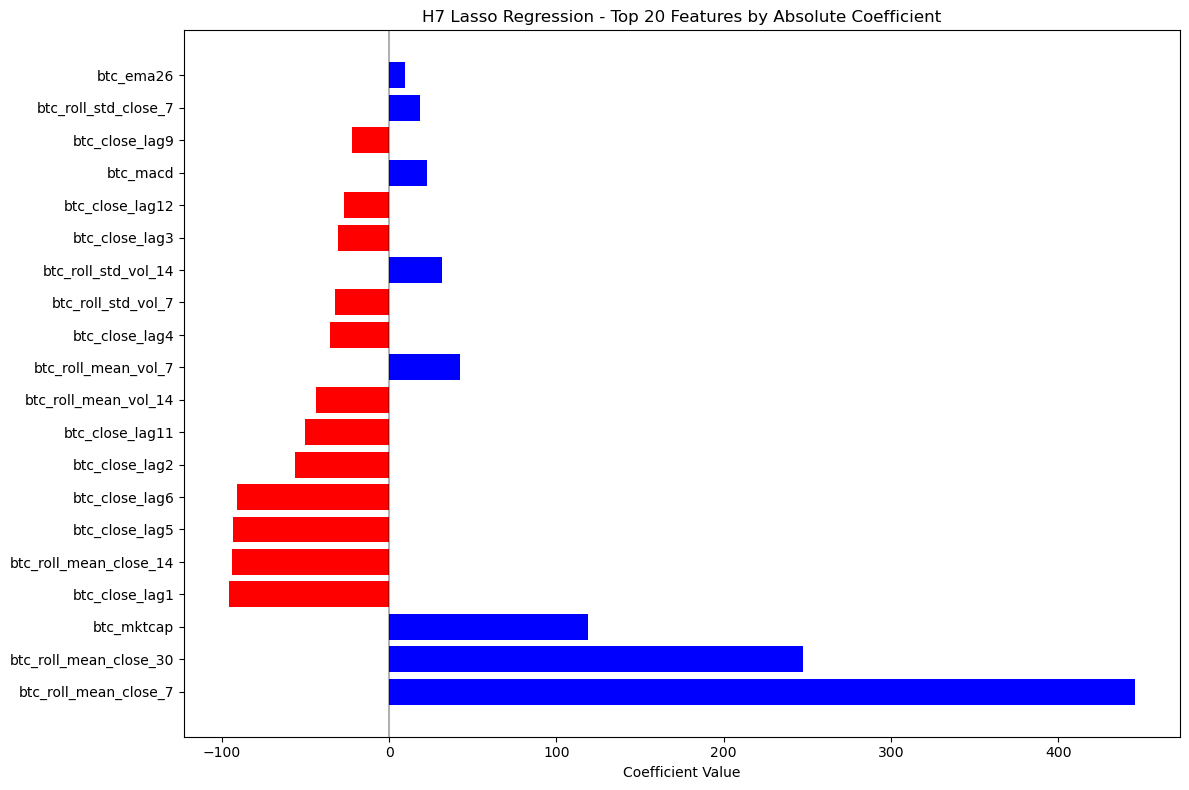

In [8]:
print("Feature Importance Analysis")
print("="*50)
# H1 Lasso
h1_lasso_features = H1ModelWrap.plot_feature_importance(bundle_h1.feature_cols, 'H1 Lasso Regression')
# H7 Lasso  
h7_lasso_features = H7ModelWrap.plot_feature_importance(bundle_h7.feature_cols, 'H7 Lasso Regression')

## üèÜ Best Model Summary (Chosen by Validation RMSE)

For **each horizon**, we pick the model  with the **lowest Validation RMSE**, then report its **R2** and **Test_MSE** metrics.  



In [9]:
# -- Produce and print the best-model summary (pick by Validation RMSE; show Test metrics)
best_summary = ModelWrapper.best_summary(results_df_classes, metric="RMSE", prefer_scaled=None)
print("\n" + "="*80)
print("BEST MODEL SUMMARY ‚Äî picked by lowest Validation RMSE; Test metrics shown")
print("="*80)
print(best_summary.to_string(index=False, float_format="%.6f"))
print("\n" + "="*80)
print("BEST MODEL SUMMARY ‚Äî picked by lowest Validation R2; Test metrics shown")
print("="*80)
best_summaryR2 = ModelWrapper.best_summary(results_df_classes, metric="R2", prefer_scaled=None)
print(best_summaryR2.to_string(index=False, float_format="%.6f"))

H1LassoNonZeroCoef=H1ModelWrap.get_lasso_nonzero_coef(bundle_h1.feature_cols)
H7LassoNonZeroCoef=H7ModelWrap.get_lasso_nonzero_coef(bundle_h1.feature_cols)
result = (
    f"H1: {H1LassoNonZeroCoef}/{len(bundle_h1.feature_cols)} features selected | "
    f"H7: {H7LassoNonZeroCoef}/{len(bundle_h7.feature_cols)} features selected"
)
print(result)




BEST MODEL SUMMARY ‚Äî picked by lowest Validation RMSE; Test metrics shown
Horizon  Model Scaled?  Val_RMSE            MSE        RMSE        MAE       R2
     H1 Linear     Yes 19.658602  235784.524346  485.576487 245.162722 0.988930
     H7 Linear     Yes 55.365016 2184313.997933 1477.942488 799.256720 0.897488

BEST MODEL SUMMARY ‚Äî picked by lowest Validation R2; Test metrics shown
Horizon  Model Scaled?   Val_R2            MSE        RMSE        MAE       R2
     H1 Linear     Yes 0.983038  235784.524346  485.576487 245.162722 0.988930
     H7 Linear     Yes 0.865957 2184313.997933 1477.942488 799.256720 0.897488
H1: 60/62 features selected | H7: 61/62 features selected


## üß≠ Baselines & Diagnostics 
  1. Compare model performance across different prediction timeframes
  2. Regularization effects of Ridge vs Lasso regression
  3. Feature selection capabilities of Lasso regression
  4. Model stability across validation and test sets
